In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
from scipy import io, sparse

from pathlib import Path

In [4]:
base_dir = Path().resolve()
base_dir

PosixPath('/mnt/ldata/Sadegh/my_codes/CosMX_Nanostring_Analysis')

## Load the Converted R Dataset

#### Read Count Matrix (scRNAseq) -> (n_genes * n_cells)

In [5]:
X = io.mmread(base_dir / "converted_files_to_python_readable/TMA1_minimal/counts.mtx").T.tocsr()
X

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 54516797 stored elements and shape (636692, 1011)>

####  Load metadata for cells

In [6]:
obs = pd.read_csv(base_dir / "converted_files_to_python_readable/TMA1_minimal/meta_data.csv", index_col=0, low_memory=False)
obs

,nCount_Nanostring,nFeature_Nanostring,cell_ID,fov,Area,AspectRatio,Width,Height,Mean.PanCK,Max.PanCK,...,Mean.CD45,Max.CD45,Mean.DAPI,Max.DAPI,id,TMA,Subject_ID,Treatment_Status,Run_Tissue_name,log10totalcounts
3_1,69,45,c_1_1_3,1,12697,0.76,133,175,2340,13564,...,48,976,1047,4076,Run5953.TMA1_3_1,TMA1,89397,Treated,Run5953_TMA1,1.838849
4_1,30,26,c_1_1_4,1,5214,0.58,70,121,1878,15412,...,49,716,1142,4104,Run5953.TMA1_4_1,TMA1,89397,Treated,Run5953_TMA1,1.477121
5_1,27,26,c_1_1_5,1,10271,1.07,119,111,876,6396,...,49,1280,1374,6080,Run5953.TMA1_5_1,TMA1,89397,Treated,Run5953_TMA1,1.431364
7_1,199,107,c_1_1_7,1,11570,0.55,97,175,1806,5444,...,848,3272,2995,11052,Run5953.TMA1_7_1,TMA1,89397,Treated,Run5953_TMA1,2.298853
9_1,454,162,c_1_1_9,1,19135,0.86,179,207,4442,32480,...,185,1516,1858,6940,Run5953.TMA1_9_1,TMA1,89397,Treated,Run5953_TMA1,2.657056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359_467,25,19,c_1_467_359,467,3488,1.16,78,67,6177,9376,...,316,936,2122,2688,Run5953.TMA1_359_467,TMA1,114262,Treated,Run5953_TMA1,1.380211
360_467,36,30,c_1_467_360,467,5611,1.44,122,85,4560,15868,...,481,7280,773,1576,Run5953.TMA1_360_467,TMA1,114262,Treated,Run5953_TMA1,1.556303
361_467,48,39,c_1_467_361,467,6563,0.94,89,95,3355,23804,...,211,4760,873,1712,Run5953.TMA1_361_467,TMA1,114262,Treated,Run5953_TMA1,1.681241
362_467,76,57,c_1_467_362,467,8518,1.26,120,95,7593,37392,...,206,4872,715,1540,Run5953.TMA1_362_467,TMA1,114262,Treated,Run5953_TMA1,1.880814


In [7]:
obs.columns

Index(['nCount_Nanostring', 'nFeature_Nanostring', 'cell_ID', 'fov', 'Area',
       'AspectRatio', 'Width', 'Height', 'Mean.PanCK', 'Max.PanCK',
       'Mean.CD68', 'Max.CD68', 'Mean.CD298_B2M', 'Max.CD298_B2M', 'Mean.CD45',
       'Max.CD45', 'Mean.DAPI', 'Max.DAPI', 'id', 'TMA', 'Subject_ID',
       'Treatment_Status', 'Run_Tissue_name', 'log10totalcounts'],
      dtype='object')

#### Load genes name

In [8]:
var = pd.read_csv(base_dir / "converted_files_to_python_readable/TMA1_minimal/genes.csv")
var = var.rename(columns={"x": "gene"})
var

,gene
0,IER3
1,IFITM1
2,TNFRSF10B
3,CEACAM1
4,CD58
...,...
1006,Negative07
1007,Negative08
1008,Negative09
1009,Negative10


#### Load cells name

In [9]:
cell = pd.read_csv(base_dir / "converted_files_to_python_readable/TMA1_minimal/cells.csv")
cell = cell.rename(columns={"x": "cell"})
cell

,cell
0,3_1
1,4_1
2,5_1
3,7_1
4,9_1
...,...
636687,359_467
636688,360_467
636689,361_467
636690,362_467


#### Load Spatial coordinates of Cells

In [10]:
spatial = pd.read_csv(base_dir / "converted_files_to_python_readable/TMA1_minimal/spatial_coords.csv", index_col=0)
spatial.index = spatial["cell"].astype(str) 
spatial = spatial.drop(columns='cell')
spatial = spatial.groupby("cell")[["x", "y"]].mean()
spatial

,x,y
cell,,
1000_101,-429731.547887,16729.919854
1000_102,-426747.539467,17380.164610
1000_105,-436700.638940,14387.959570
1000_106,-429605.107568,14157.730260
1000_107,-425184.227346,13948.609570
...,...,...
9_95,-405192.320918,41139.135888
9_96,-425218.177801,36878.566686
9_97,-421296.753196,36888.133879


In [11]:
# centroid_df = pd.read_csv(base_dir / 'converted_files_to_python_readable/TMA1_minimal/centroids_merged.csv',index_col=0)
# centroid_df.index.name = "cell"
# centroid_df
# adata.obsm["spatial"] = centroid_df.loc[adata.obs_names].values

#### Load Cell clusters data

In [12]:
cluster_df = pd.read_csv(base_dir / "converted_files_to_python_readable/TMA1_minimal/cluster_identities.csv",index_col=0) 
cluster_df = cluster_df.rename(columns={"x": "cluster_type"})
cluster_df

,cluster_type
3_1,TA
4_1,TA
5_1,a
7_1,Pericyte
9_1,TA
...,...
359_467,NK.cell
360_467,Tuft
361_467,SLO.cells
362_467,Tuft


## Convert to Scanpy AnnData 

In [13]:
adata = sc.AnnData(X=X, obs=obs, var=var)
adata.obsm["spatial"] = spatial.loc[adata.obs_names].values
adata.obs["cluster_type"] = cluster_df.loc[adata.obs.index, "cluster_type"].values
adata.obs["cluster_type"] = adata.obs["cluster_type"].astype("category")
adata

/mnt/ldata/Sadegh/miniconda3/lib/python3.13/functools.py:934: ImplicitModificationWarning: Transforming to str index.
  return dispatch(args[0].__class__)(*args, **kw)


AnnData object with n_obs × n_vars = 636692 × 1011
    obs: 'nCount_Nanostring', 'nFeature_Nanostring', 'cell_ID', 'fov', 'Area', 'AspectRatio', 'Width', 'Height', 'Mean.PanCK', 'Max.PanCK', 'Mean.CD68', 'Max.CD68', 'Mean.CD298_B2M', 'Max.CD298_B2M', 'Mean.CD45', 'Max.CD45', 'Mean.DAPI', 'Max.DAPI', 'id', 'TMA', 'Subject_ID', 'Treatment_Status', 'Run_Tissue_name', 'log10totalcounts', 'cluster_type'
    var: 'gene'
    obsm: 'spatial'

### Analysis of cell features

#### Treatment Status

In [14]:
treatment_df = pd.DataFrame(adata.obs['Treatment_Status'])
treatment_frequency = treatment_df['Treatment_Status'].value_counts()
treatment_frequency

Treatment_Status
Untreated    322628
Treated      314064
Name: count, dtype: int64

#### Cluster type 

In [15]:
cluster_type_df = pd.DataFrame(adata.obs['cluster_type'])
cluster_type_df = cluster_type_df['cluster_type'].value_counts()
cluster_type_df

cluster_type
a                                127997
c                                 51506
d                                 48211
myofibroblast                     47246
Goblet.cell                       36384
Colonocyte                        30758
ICC                               27593
TA                                25572
NK.cell                           20241
Enterocyte                        18469
arterial.capillary                16778
Tuft                              16545
SLO.cells                         16326
pDC                               14512
Treg                              11594
FDC                               10932
Monocytes                         10720
Pericyte                          10046
Macrophages                        9839
MPO..mono.neutrophil               8185
CLP                                7067
venous.capillary                   6625
cDC                                6452
Mast.cell                          6375
Plasma.cell                

### Plot spatial Cell coordination based on Subject ID and Cluster type

In [17]:
# Change x and y axis for better presentation
adata.obsm['spatial'] = adata.obsm['spatial'][:, [1, 0]]

/tmp/ipykernel_3433855/589150201.py:3: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(


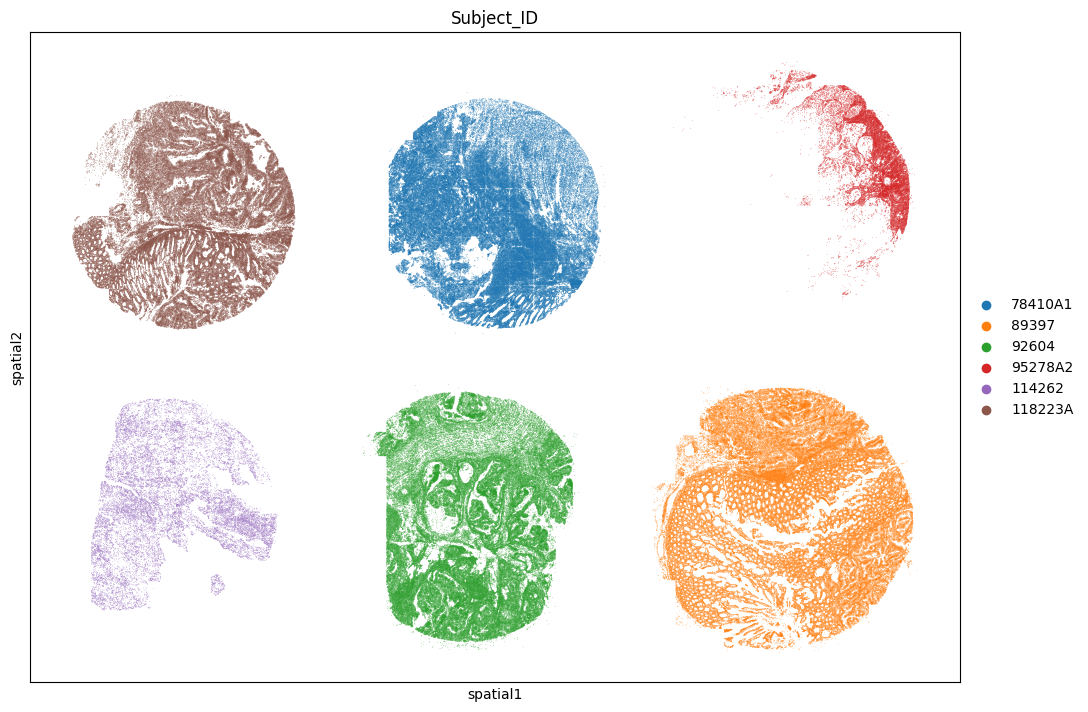

In [18]:
# by Subject ID 
plt.rcParams["figure.figsize"] = (12, 12)
sc.pl.spatial(
    adata,
    img_key=None,
    color="Subject_ID",
    spot_size=100,   
    alpha_img=0.0,
    save="_spatial_subjectid.png"
)

/tmp/ipykernel_3433855/955488075.py:3: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(


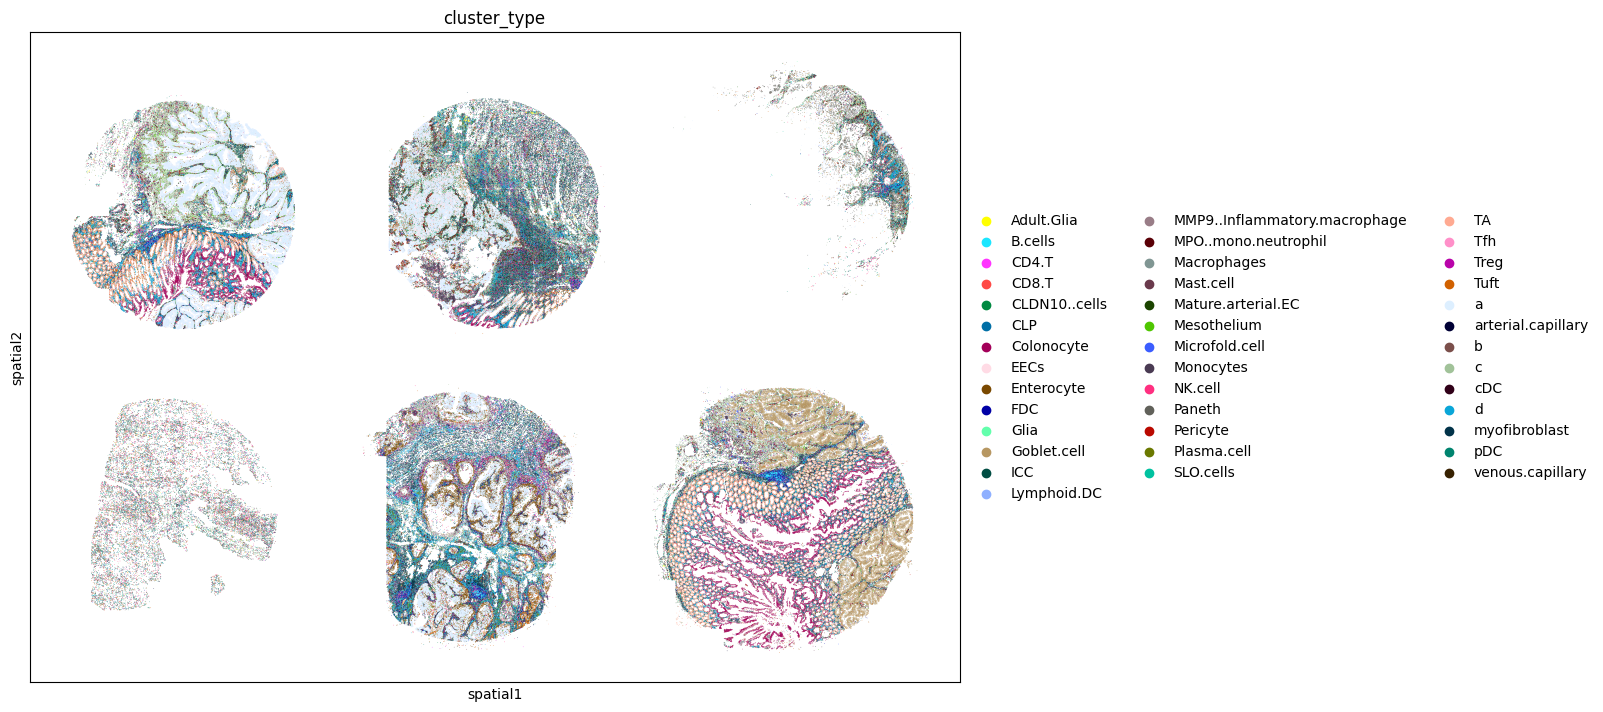

In [20]:
# by Cluster type
plt.rcParams["figure.figsize"] = (12, 12)
sc.pl.spatial(
    adata,
    img_key=None,
    color="cluster_type",
    spot_size=100,   
    alpha_img=0.0,
    save= "_spatial_cluster_id.png"
)